Application of K-means clustering using scikit learn for classification of flowers from the IRIS dataset available [here](https://archive.ics.uci.edu/ml/datasets/iris) in csv format.


About the data-

Number of attributes - 4 (Sepal length, sepal width, petal length and petal width)

Attribute to be predicted - Type of flower


Scikit learn's kmeans is documented [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import sklearn.model_selection
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.cluster as sklc
%matplotlib inline

In [2]:
iris_full=pd.read_csv("iris.data", names=['sepal_length','sepal_width','petal_length','petal_width','type'],header=None)
#Read dataset

In [3]:
#Split the attributes into X and variable to be predicted into Y_orig
X =iris_full[['sepal_length', 'sepal_width','petal_length','petal_width']]
Y_orig= iris_full['type']
names=list(Y_orig.unique())

#Map categorical string values to numeral values
change = {names[0]:0, names[1]:1, names[2]:2}
Y = Y_orig.replace(change)
iris = X.join(Y)

In [4]:
#Use principal component analysis to convert 4 attributes to 2 for plotting graph
pca = PCA(n_components=2).fit(iris)
pca_2d = pca.transform(iris)

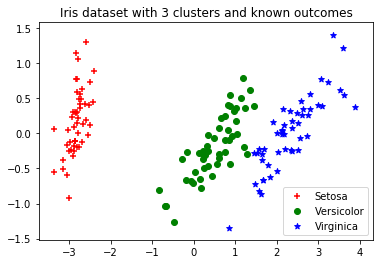

In [5]:
#Plot original data with given labels

import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if iris.type[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
    elif iris.type[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif iris.type[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])
pl.title('Iris dataset with 3 clusters and known outcomes')
pl.show()

In [6]:
#Implementing Kmeans, 3 clusters for 3 categories
#n_init - Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia. Default - 10
kmean= sklc.KMeans(n_clusters=3, n_init=20).fit(X)

#Y_pred holds the predicted values for X based on the clusters formed
Y_pred=kmean.predict(X)

In [7]:
Y_pred=pd.Series(Y_pred, name='type')

In [8]:
#Caclculate accuracy of the predictions 

sum=0
max_accuracy=0
comb=[0,1,2]
import itertools
perm = itertools.permutations([0,1,2], 3)
for p in perm:
    temp= Y_pred.replace({0:p[0], 1:p[1], 2:p[2]})
    sum=0
    for x,y in zip(Y, temp):
        if x==y:
            sum=sum+1
    accuracy=sum/len(Y)*100
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        comb=p
print("Accuracy = %f" %max_accuracy)
Y_pred.replace({0:comb[0], 1:comb[1], 2:comb[2]}, inplace=True)

Accuracy = 89.333333


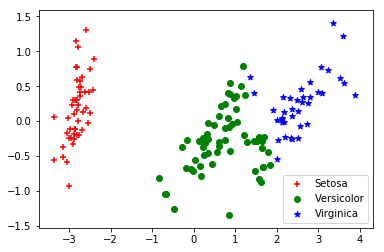

In [9]:
#Plot predicted values of kmeans for the same X

PredIris= X.join(Y_pred)
for i in range(0, pca_2d.shape[0]):
    if PredIris.type[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
    elif PredIris.type[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif PredIris.type[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])

pl.show()